In [5]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000
#padding les than 20
maxlen = 20

(x_train, y_train),(x_test,y_test) = imdb.load_data(num_words = max_features)

print(x_train.shape)
print(x_test.shape)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)


print(x_train.shape)
print(x_test.shape)

(25000,)
(25000,)
(25000, 20)
(25000, 20)


In [11]:
from keras.models import Sequential
from keras import layers

model = Sequential()
# connect LSTM with LSTM return_sequences=True

# each word in a vector of 8, number of words=20
# if you have biggest vocabulary we choose more than 8.
# vocabulary size=10000

# we can download the embedding from other site and give a huge kickstart to the
# ANN

   
model.add(layers.Embedding(10000, 8, input_length=maxlen))
model.add(layers.LSTM(32, activation='relu',return_sequences=True ))
model.add(layers.Dense(len(vocabulary)))
model.add(layers.Activation('softmax'))

model.summary()

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])

history = model.fit(
  x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 32)            5248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 640)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 641       
Total params: 85,889
Trainable params: 85,889
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 9280/20000 [============>.................] - ETA: 7s - loss: 0.6644 - acc: 0.5704

20000/20000 [==============================] - 14s 690us/step - loss: 0.5939 - acc: 0.6572 - val_loss: 0.5089 - val_acc: 0.7444
Epoch 2/10
20000/20000 [==============================] - 14s 684us/step - loss: 0.4334 - acc: 0.8010 - val_loss: 0.5487 - val_acc: 0.7334
Epoch 3/10
11104/20000 [===============>..............] - ETA: 5s - loss: 0.3573 - acc: 0.8427

20000/20000 [==============================] - 14s 679us/step - loss: 0.3669 - acc: 0.8382 - val_loss: 0.5314 - val_acc: 0.7404
Epoch 4/10
20000/20000 [==============================] - 14s 682us/step - loss: 0.3187 - acc: 0.8622 - val_loss: 0.6020 - val_acc: 0.7382
Epoch 5/10
11744/20000 [================>.............] - ETA: 5s - loss: 0.2614 - acc: 0.8911

20000/20000 [==============================] - 14s 677us/step - loss: 0.2735 - acc: 0.8839 - val_loss: 0.6138 - val_acc: 0.7332
Epoch 6/10
20000/20000 [==============================] - 14s 679us/step - loss: 0.2312 - acc: 0.9050 - val_loss: 0.6908 - val_acc: 0.7226
Epoch 7/10
11808/20000 [================>.............] - ETA: 5s - loss: 0.1808 - acc: 0.9271

20000/20000 [==============================] - 14s 676us/step - loss: 0.1939 - acc: 0.9218 - val_loss: 0.8681 - val_acc: 0.7200
Epoch 8/10
20000/20000 [==============================] - 13s 673us/step - loss: 0.1603 - acc: 0.9387 - val_loss: 1.1236 - val_acc: 0.7190
Epoch 9/10
12128/20000 [=================>............] - ETA: 5s - loss: 0.1221 - acc: 0.9533

20000/20000 [==============================] - 13s 666us/step - loss: 0.1304 - acc: 0.9485 - val_loss: 1.1899 - val_acc: 0.7024
Epoch 10/10
20000/20000 [==============================] - 13s 672us/step - loss: 0.1135 - acc: 0.9578 - val_loss: 1.4148 - val_acc: 0.7126


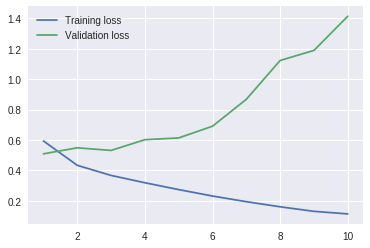

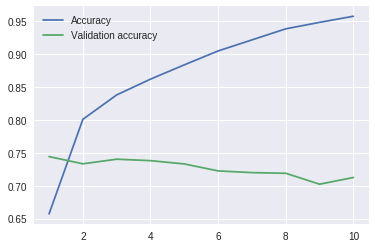

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label="Validation loss")

plt.legend()
plt.show()
plt.clf

acc_values = history_dict["acc"]
val_acc_values = history_dict["val_acc"]
plt.plot(epochs, acc_values, label="Accuracy")
plt.plot(epochs, val_acc_values, label="Validation accuracy")
plt.legend()

plt.show()